# EDA & Data Preprocessing
This document runs a basic EDA and data cleaning in order to formulate appropriate classification algorithm and to create a clean dataset to feed as training data. 
At the end of this we will have initial structures of symptoms related tables as below  
    1. Symptoms Table  
    2. Symptoms Relation  
    3. User Symptoms  
As well as basis of the scripts for     
    1. Computing / Updating phi correlation between target conditions and symptoms  
    2. NLP preprocessing to determine probability or similarity of how much given text indicates each symptom 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
df = pd.read_excel('data/NF Registry NF1 092420 v2.xls', sheet_name = 'Data')

In [29]:
refs = pd.read_excel('data/NF Registry NF1 092420 v2.xls', sheet_name = 'Report')

Remove the patient ID given there is no duplicates.

In [22]:
df = df.drop('Patient Id', axis = 1)

In [34]:
print(df.shape[0], 'patients data')

8223 patients data


We are interested in the correlations between symptoms.

In [381]:
symptoms = df.iloc[:, 30:-2]

In [382]:
symptoms['pain'] = np.where(df['Has Pain'] == True, 'yes', 'no')

In [383]:
symptoms = symptoms.fillna('')

In [384]:
drop_list = ['Gt Blood Done',
 'Gt Confirmed Nf1',
 'Nf Severity',
 'Spots Where',
 'Itching Details',
 'Itching Treatment',
 'Rx Response',
 'Oral Medication',
 'Cream',
 'Ketotifen',
 'Turmeric',
 'Vitamin',
 'Other',
 'Age Neurofibromas Develop',
 'Nf Treated',
 'Plexiforms Nf Locations',
 'Plexiform Nf Rx',
 'Spinal Nf Rx',
 'Cognitive Interventions',
 'Cognitive Therapy',
 'Optic Glioma Age',
 'Optic Glioma Rx',
 'Mpnst Diagnosed Age',
 'Mpnst Rx',
 'Osteoporosis Rx',
 'Scolosis Type',
 'Scolosis Rx',
 'Bone Bowing Confirmed',
 'Bone Bowing Rx',
 'Alternative Medicines',
 'Alternative Medicines List',
 'Family Nf1',
 'Family Members Nf',
 'Bc Age',
 'Bc Rx',
 'Pregnancy',
 'Pregnancy Nf',
 'Ct Nf1 Participation',
 'Ct Symptoms Rx',
 'Ct Date Enrolled',
 'Other Ct Treatment',
 'Research Nf1',
 'Test Date',
 'Gene',
 'Source Tested',
 'Source Tumor',
 'Test Method',
 'Category',
 'Std Nomenclature',
 'Start Exon',
 'Nucleotide',
 'Amin Acid',
 'Pathogenicity',
 'Frame']

In [385]:
expand_list = [
 'Plexiforms Problems',
 'Adhd',
 'Has Cvs Problems',
 'Has Cyst Tumor',
 'Growth Hormonal Problems',
 'Has Cns Problems',
 'Vision Changes']

In [386]:
yes_list = ['Has Spots',
 'Freckles Armpit',
 'Freckles Groin',
 'Has Itching',
 'Plexiform Nf',
 'Plexiforms Visible',
 'Spinal Nf',
 'Has Cognitive Difficulties',
 'Has Autism Disorder',
 'Optic Glioma Diagnosed',
 'Lisch Nodules',
 'Mpnst',
 'Sphenoid Wing Dysplasia',
 'Fractures',
 'Osteoporosis',
 'Bone Bowing',
 'Breast Cancer', 
 'pain', 
 'Cutaneous Nf No', 
 'Scolosis']

#### Drop list
Remove all non-symptom columns

In [387]:
symptoms = symptoms.drop(drop_list, axis = 1)

#### Yes list
If existing columns are just yes or no, convert them to be binary.

In [388]:
def just_yes(series_):
    return series_.apply(lambda x: 1 if 'yes' in x.lower() else 0)

In [389]:
symptoms[yes_list] = symptoms[yes_list].apply(lambda x: just_yes(x))

### Expand list
For the rest, we will look at them individually.

In [391]:
expand_list

['Plexiforms Problems',
 'Adhd',
 'Has Cvs Problems',
 'Has Cyst Tumor',
 'Growth Hormonal Problems',
 'Has Cns Problems',
 'Vision Changes']

In [392]:
# plexiforms problems
symptoms['bowel or bladder control problem'] = symptoms['Plexiforms Problems'].apply(lambda x: 1 if 'bowel or bladder control' in x.lower() else 0)
symptoms['breathing problem'] = symptoms['Plexiforms Problems'].apply(lambda x: 1 if 'breathing' in x.lower() else 0)
symptoms['Problem with movement'] = symptoms['Plexiforms Problems'].apply(lambda x: 1 if 'movement or ability to walk' in x.lower() else 0)
symptoms['Numbness'] = symptoms['Plexiforms Problems'].apply(lambda x: 1 if 'numbness' in x.lower() else 0)
symptoms = symptoms.drop('Plexiforms Problems', axis = 1)

In [393]:
# ADHD: divide into learning_disability, attention_issue, and ADD/ADHD
symptoms['learning disabilities'] = symptoms['Adhd'].apply(lambda x: 1 if 'learning disabilities' in x.lower() else 0)
symptoms['attention issues'] = symptoms['Adhd'].apply(lambda x: 1 if 'attention issues' in x.lower() else 0)
symptoms['ADD_ADHD'] = symptoms['Adhd'].apply(lambda x: 1 if 'ADD' in x.lower() else 0)
symptoms = symptoms.drop('Adhd', axis = 1)

In [394]:
# Has Cvs Problems
# CVS: heart murmur, vascular or blood vessel issues, high blood pressure, moya moya, heart defect, pulmonic stenosis, 
# heart valve problems, renal artery stenosis

cvs_types = ['heart murmur', 'vascular or blood vessel issues', 'high blood pressure', 
             'moya moya', 'heart defect', 'pulmonic stenosis', 'heart valve problems', 'renal artery stenosis']

for typ in cvs_types: 
    symptoms[typ] = symptoms['Has Cvs Problems'].apply(lambda x: 1 if typ in x.lower() else 0)
symptoms = symptoms.drop('Has Cvs Problems', axis = 1)

In [395]:
# Has Cyst Tumor
cyst_tumor_types = ['adrenal tumor', 'bone cysts', 'brain tumor', 'breast cancer', 'gist', 
                    'gastrointestinal stromal tumors', 'glomus tumors', 'leukemia']

for typ in cyst_tumor_types: 
    symptoms[typ] = symptoms['Has Cyst Tumor'].apply(lambda x: 1 if typ in x.lower() else 0)
symptoms = symptoms.drop('Has Cyst Tumor', axis = 1)

In [396]:
# growth hormonal problems
hormonal_types = ['Chewing/swallowing problems',
                  'Constipation',
                  'Early onset of puberty (prior to the age of 8)',
                  'Hormonal imbalance that affected pregnancy or birth control',
                  'Large head size',
                  'Late onset of puberty (after the age of 17)',
                  'Over (hyper) or under (hypo) active thyroid',
                  'Poor weight gain in childhood',
                  'Reflux or gastroesophageal reflux (GERD)',
                  'Short stature']
for typ in hormonal_types: 
    symptoms[typ] = symptoms['Growth Hormonal Problems'].apply(lambda x: 1 if typ in x else 0)
symptoms = symptoms.drop('Growth Hormonal Problems', axis = 1)

In [397]:
# Has Cns Problems
cns_types = ['Anxiety',
             'Arthritis',
             'Depression',
             'Difficulties with social interactions',
             'Fatigue',
             'Headaches or migraines',
             'Hydrocephalus (extra fluid or "water on the brain")',
             'Joint pain',
             'Loose (hyperextensible) joints',
             'Muscle tone or coordination issues',
             'Other mental health diagnosis',
             'Seizures or epilepsy',
             'Sleep disturbances']
for typ in cns_types: 
    symptoms[typ] = symptoms['Has Cns Problems'].apply(lambda x: 1 if typ in x else 0)

symptoms = symptoms.drop('Has Cns Problems', axis = 1)

In [398]:
# vision changes
symptoms['Vision Changes'] = [1 if x in ['Severe changes', 'Mild changes', 'Moderate changes'] else 0 for x in symptoms['Vision Changes'] ]

In [399]:
# there are two breast cancer columns, combine them
symptoms['Breast Cancer'] = np.where(symptoms['Breast Cancer'] + symptoms['breast cancer'] == 0, 0, 1)
symptoms = symptoms.drop('breast cancer', axis = 1)

In [400]:
# combine two gist columns
symptoms['gastrointestinal stromal tumors'] = np.where(symptoms['gastrointestinal stromal tumors'] + symptoms['gist'] == 0, 0, 1)
symptoms = symptoms.drop('gist', axis = 1)

In [444]:
symptoms.columns = keys.symptom

In [446]:
symptoms.head(5)

symptom,Spots,Freckles onn armpit,Freckles on groin,Itching,Cutaneous Neurofibromas,Plexiform Neurofibromas,Visible Plexiform Neurofibromas,Spinal Neurofibromas,Cognitive Difficulties,Autism Spectrum Disorder,...,Difficulties with social interactions,Fatigue,Headaches or migraines,Hydrocephalus,Joint pain,Loose joints,Muscle coordination issues,Other mental health problems,Seizures or epilepsy,Sleep disturbances
0,1,1,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
2,1,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,1,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,0,0,1,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [520]:
# save symptoms
symptoms.to_csv('data/symptoms_existing_data.csv')

# Database Structure
Now we have the symptoms data cleaned. I'll create a symptoms table structure (columns = name, target, description).

In [ ]:
# manual input
key_dict = {}
for i, col in enumerate(symptoms.columns, 1):
    print ('======')
    print (col)
    target = input('Is it a target condition? (y = 1)')
    name = input('Write name: ')
    if target == '1':
        desc = input('Write description: ')
    else: 
        desc = None
    key_dict[i] = {'symptom': name, 'target': target, 'description': desc}
keys = pd.DataFrame(key_dict).T

In [426]:
# save keys
keys.to_csv('data/keys.csv')

## Phi Correlation
We'll compute the correlation map between symptoms.

In [428]:
from sklearn.metrics import matthews_corrcoef

In [449]:
target = keys[keys.target == '1'].symptom.values

In [460]:
vals = []
for col1 in target: 
    for col2 in symptoms.columns:
        vals.append(matthews_corrcoef(symptoms[col1], symptoms[col2]))

In [461]:
vals = np.array(vals).reshape((len(target), len(symptoms.columns)))

In [462]:
vals.shape

(30, 65)

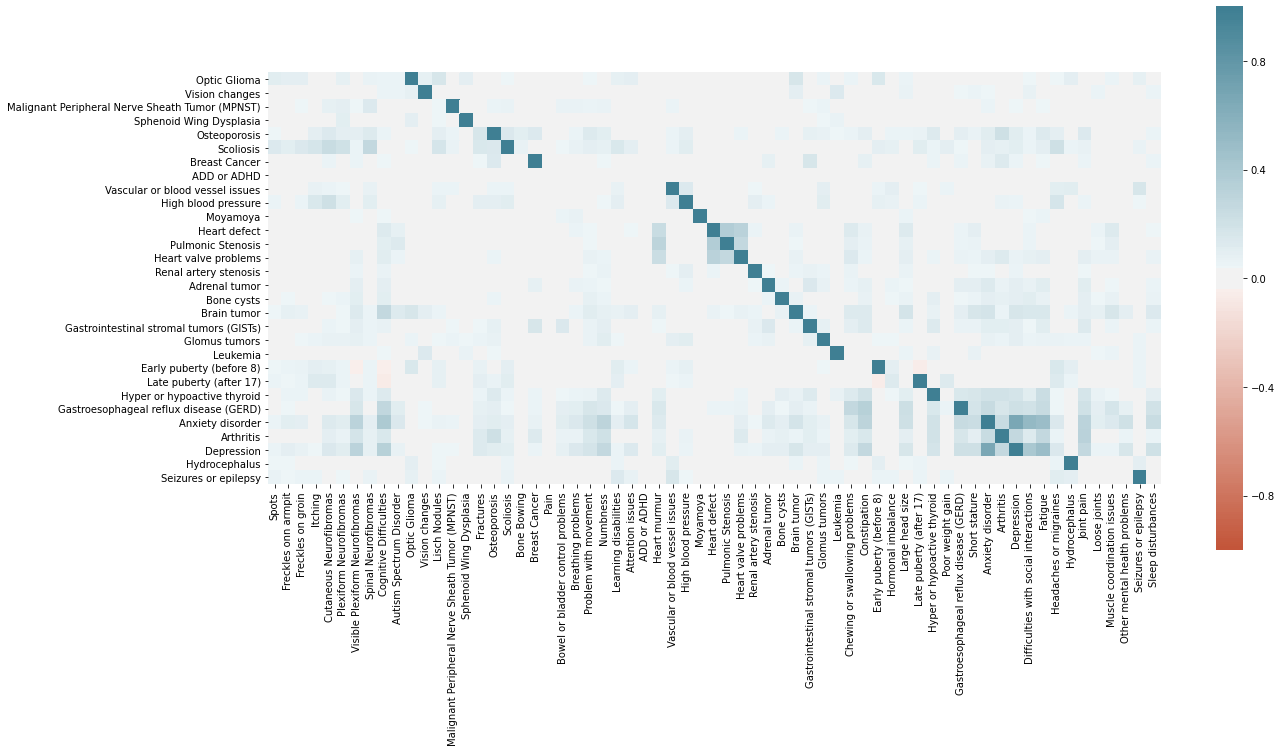

In [468]:
import seaborn as sns
plt.figure(figsize = (20, 10))
ax = sns.heatmap(
    vals, xticklabels = symptoms.columns, yticklabels = target, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)

In [469]:
corr = pd.DataFrame(vals, columns = symptoms.columns, index = target)

In [473]:
tmp = corr.replace(1, np.nan)

In [478]:
high_corr = {}
for col in tmp.columns: 
    high_corr[col] = dict(round(tmp[col][tmp[col] > 0.20].sort_values(ascending = False), 2))

### Exporting correlation table
now I'll export the current correlation to feed into the table.

In [647]:
symptom_relations = pd.DataFrame(corr.stack()).reset_index()

In [648]:
symptom_relations.columns = ['target_id', 'symptom_id', 'phi_correlation']

In [649]:
symptom_relations.head(3)

,target_id,symptom_id,phi_correlation
0,Optic Glioma,Spots,0.113265
1,Optic Glioma,Freckles onn armpit,0.096045
2,Optic Glioma,Freckles on groin,0.097914


Now change it to the index from keys

In [650]:
key_dict = dict(zip(keys.symptom, keys.index))

In [651]:
symptom_relations = symptom_relations.replace(key_dict)

In [652]:
symptom_relations.head(5)

,target_id,symptom_id,phi_correlation
0,11,1,0.113265
1,11,2,0.096045
2,11,3,0.097914
3,11,4,0.010724
4,11,5,0.000054


In [519]:
# save symptom_relations table
symptom_relations.to_csv('data/symptom_relations.csv')

# Extracting Symptoms
Now I will write some simple nlp steps to extract symptoms from descriptions. Until we collect enough text data, we will rely on the vector space provided by Spacy  to determine how closely a description is related to the each symptoms. We'll also see if the public domain medical transcription data will create a better vector space to identify the symptoms from descriptions.

In [527]:
mt = pd.read_csv('data/medical_transcription_samples.csv', index_col = 0)

In [537]:
mt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4999 entries, 0 to 4998
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   description        4999 non-null   object
 1   medical_specialty  4999 non-null   object
 2   sample_name        4999 non-null   object
 3   transcription      4966 non-null   object
 4   keywords           3931 non-null   object
dtypes: object(5)
memory usage: 234.3+ KB


### Preprocessing
first, preprocessing steps for text input

In [844]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk import bigrams
from nltk.stem import WordNetLemmatizer

def remove_punctuations(text, punctuations = '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~�0123456789'):
    ''' remove punctuations '''
    table_ = str.maketrans('', '', punctuations)
    return text.translate(table_)

def ascii_only(text):
    ''' remove non-ascii words '''
    return text.encode("ascii", "ignore").decode()

def lemmatize(word):
    ''' lemmatize text'''
    wnl = WordNetLemmatizer()
    return wnl.lemmatize(word)

def preprocess(text, sw = ['i', 'me', 'my', 'myself', 'we', 'our',
                         'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your',
                         'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she',
                         "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
                         'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll",
                         'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have',
                         'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but',
                         'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about',
                         'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above',
                         'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again',
                         'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all',
                         'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such',
                         'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very',
                         's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now',
                         'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't",
                         'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven',
                         "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't",
                         'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn',
                         "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't", 'felt', 'feel', 'feels']):
    '''
    Takes a text as an input
    Preprocess (remove punctuations, turn lower case, lemmatize, remove stop words)
    Return a nested array with a tokens per sentence
    '''
    if isinstance(text, str):
        text = ascii_only(text.lower())

        text_tokens = []
        for sentence in sent_tokenize(text): 
            sentence = remove_punctuations(sentence)
            tokens = word_tokenize(sentence)
            text_tokens.append([lemmatize(word) for word in tokens if word not in sw])
        return text_tokens
    else: 
        return 'no input'
    

In [585]:
# preprocessing all transcriptions
text_input = [preprocess(x) for x in mt.transcription]

In [590]:
from itertools import chain
# unnesting once
text_input = list(chain(*text_input))

In [591]:
len(text_input)

140476

### Word2Vec training
Below is the method to create a vector space by training with word2vec. But for the prototype we will use the pretrained model. But once we obtain enough text data, we can retrain the vector space with more targeted language.

In [664]:
from gensim.models import Word2Vec

In [ ]:
# this is when we train our own vector space using text_input preprocessed above
#model = Word2Vec(sentences = text_input)

In [736]:
# for now we will use GloVe 
import gensim.downloader
# for initial run 
model = gensim.downloader.load('glove-wiki-gigaword-300')

In [737]:
model.save("model/word2vec.model")
#model = Word2Vec.load("model/word2vec.model")

In [738]:
model.init_sims(replace=True) # normalize if we need to retrain, remove replace

In [739]:
model.save("model/word2vec_norm.model")
#model = Word2Vec.load("model/word2vec_norm.model")

We now have a vector space. 
For now, we'll use average vector of sentence to estimate. But in the future, we will turn this into doc2vec and check the sentence similarity instead of word similarity to increase accuracy.

In [807]:
import numpy as np

def get_avg_vectors(text, model):
    if isinstance(text, str):
        text_input = preprocess(text)
    else: 
        text_input = text.copy()
    avg_vec = []
    for sentence in text_input:
        vectors = []
        for word in sentence:
            try:
                vectors.append(model[word])
            except KeyError:
                print(f'{word} not exists')
                pass
        avg = np.average(vectors, axis = 0)
        avg_vec.append(avg)
    return avg_vec

In [773]:
symptoms = keys.symptom.values

In [774]:
symptom_vectors = get_avg_vectors('. '.join(symptoms), model)

neurofibroma not exists
neurofibroma not exists
neurofibroma not exists
neurofibroma not exists
mpnst not exists
moyamoya not exists


/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:390: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [775]:
symptom_vectors = dict(zip(symptoms, symptom_vectors))

In [776]:
import joblib
joblib.dump(symptom_vectors, 'symptom_vectors.pkl')

['symptom_vectors.pkl']

In [854]:
# for each sentence, see how close they are to target symptoms
from scipy.spatial.distance import cosine

def identify_symptom(text, symptom_vectors, model, threshold = 0.5):
    '''
    Find the closest symptom per sentences
    '''
    avg_vec = get_avg_vectors(text, model)
    pred_symptoms = {}

    for sent_vec in avg_vec: 
        
        # for each sentence
        max_ = threshold

        for symptom, sym_vec in symptom_vectors.items():
            similarity =  1 - cosine(sent_vec, sym_vec)
            if similarity > max_:

                max_ = similarity
                max_symptom = symptom
        if max_ > threshold:
            try: 
                # if symptom already exists, update if similarity is higher
                if max_ > pred_symptoms[max_symptom] : 
                    pred_symptoms[max_symptom] = max_

            except: 
                # add symptom if it does not exist
                pred_symptoms[max_symptom] = max_
    return [k for k, v in sorted(pred_symptoms.items(), key = lambda item: item[1])]        

In [860]:
text = "I have a high fever and headache. Things look a little strange. Pain on the left side of the body. Also felt a bit of numbness. It seems like I had hard time moving my limbs"
result = identify_symptom(text, symptom_vectors, model)

In [861]:
result

['Vision changes',
 'Numbness',
 'Problem with movement',
 'Pain',
 'Headaches or migraines']

In [926]:
def return_symptom_id(symptom_list, keys):
    return [keys[keys.symptom == x].index[0] for x in symptom_list]

In [927]:
# return symptom_id for this
result_symptom_id = return_symptom_id(result, keys)
result_symptom_id

[12, 25, 24, 21, 58]

For the next iteration, we can present users with the select list of symptoms so they can provide a feedback as to how accurate our model is, then retrain based on their answer.

## Suggested Attention
Now I'll create a script to suggest what other target symptom to look out for based on this identified symptoms.

In [918]:
# load symptoms_relations dataset
symptom_relations.head(5)

,target_id,symptom_id,phi_correlation
0,11,1,0.113265
1,11,2,0.096045
2,11,3,0.097914
3,11,4,0.010724
4,11,5,0.000054


Find the highest correlation for each symptom and if any of them is above .25 return.

In [914]:
def high_corr_target(result_symptom_id, symptom_relations_table, threshold = 0.25):
    ''' given symptoms and symptom relations table find the target conditions'''
    targets = []
    table_ = symptom_relations_table[~symptom_relations_table['target_id'].isin(result_symptom_id)]
    for ind in result_symptom_id: 
        high_target = table_[table_.symptom_id == ind].sort_values('phi_correlation', ascending = False).iloc[1]
        if high_target.phi_correlation > threshold: 
            targets.append(int(high_target.target_id))
    return set(targets)

In [915]:
target = high_corr_target([55, 57, 44], symptom_relations)

In [916]:
target

{53, 54}

In [920]:
# return targets as names
# load keys
keys.head(5)

,symptom,target,description
1,Spots,0,None
2,Freckles onn armpit,0,None
3,Freckles on groin,0,None
4,Itching,0,None
5,Cutaneous Neurofibromas,0,None


In [921]:
def return_names(list_of_ids, keys):
    return [keys.iloc[i].symptom for i in list_of_ids]

In [924]:
output = return_names(target, keys)

In [925]:
output

['Arthritis', 'Depression']